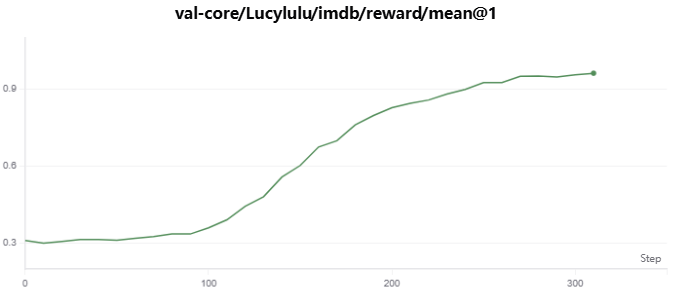

In [1]:
from PIL import Image
img = Image.open('../expfigures/imdb_ppo.png')
img.show()

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel
raw_path = '/home/xinglixian/models/Qwen2.5-0.5B-Instruct'
# post_path = '../examples/ppo_trainer/checkpoints/verl_nagative_gen/qwen2.5-0.5B-imdb-negative/global_step_310/actor/huggingface'
post_adapter = '/home/xinglixian/proj/verl/examples/ppo_trainer/checkpoints/verl_nagative_gen/qwen2.5-0.5B-instruct-23gram11-robertalarge-negative/global_step_150/actor/lora_adapter'

model = AutoModelForCausalLM.from_pretrained(raw_path)
# adapter_model = PeftModel.from_pretrained(model, post_adapter)
tokenizer = AutoTokenizer.from_pretrained(raw_path, use_fast=True)
tokenizer.padding_side = 'left'

/home/xinglixian/miniconda3/envs/verl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/xinglixian/miniconda3/envs/verl/lib/python3.12/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [ ]:
import torch
def batch_generate(prompts, batch_size=4, max_length=100, **generate_kwargs):
    """
    批量文本生成
    """
    model.eval()
    all_generated_texts = []
    
    for i in range(0, len(prompts), batch_size):
        batch_prompts = prompts[i:i+batch_size]

        inputs = tokenizer(
            batch_prompts, 
            padding=True, 
            truncation=True, 
            return_tensors="pt",
            max_length=512
        )
        
        with torch.no_grad():
            outputs = model.generate(
                input_ids=inputs['input_ids'],
                attention_mask=inputs['attention_mask'],
                max_length=max_length,
                num_return_sequences=1,
                do_sample=False,
                pad_token_id=tokenizer.pad_token_id,
                **generate_kwargs
            )
        
        generated_texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        all_generated_texts.extend(generated_texts)
    
    return all_generated_texts

prompts = [
    "Continue the following movie review text.\n\nReview Start:This movie is",
    "Continue the following movie review text.\n\nReview Start:The plot is good",
    "Continue the following movie review text.\n\nReview Start:I love this",
    "Continue the following movie review text.\n\nReview Start:T think this film is"
]

results = batch_generate(prompts, batch_size=2, max_length=50)
for prompt, result in zip(prompts, results):
    print(f"输入: {prompt}")
    print(f"生成: {result}")
    print("-" * 50)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


输入: Continue the following movie review text.

Review Start:This movie is
生成: Continue the following movie review text.

Review Start:This movie is a very good one. It's not just a comedy, but it also has some serious themes that are worth exploring. The acting is great and the story is well written. 

Review
--------------------------------------------------
输入: Continue the following movie review text.

Review Start:The plot is good
生成: Continue the following movie review text.

Review Start:The plot is good, but it's not a very well written one. The characters are also weak and uninteresting. 

Review End: I found this movie to be quite disappointing. It was poorly written
--------------------------------------------------
输入: Continue the following movie review text.

Review Start:I love this
生成: Continue the following movie review text.

Review Start:I love this movie. It's a great film, and I'm sure it will be popular with many people. The acting is excellent, and the story is we

In [ ]:
import torch
adapter_model = PeftModel.from_pretrained(model, post_adapter)
def batch_generate(prompts, batch_size=4, max_length=100, **generate_kwargs):
    """
    批量文本生成
    """
    model.eval()
    all_generated_texts = []
    
    for i in range(0, len(prompts), batch_size):
        batch_prompts = prompts[i:i+batch_size]
        
        inputs = tokenizer(
            batch_prompts, 
            padding=True, 
            truncation=True, 
            return_tensors="pt",
            max_length=512
        )

        with torch.no_grad():
            outputs = adapter_model.generate(
                input_ids=inputs['input_ids'],
                attention_mask=inputs['attention_mask'],
                max_length=max_length,
                num_return_sequences=1,
                do_sample=False,
                pad_token_id=tokenizer.pad_token_id,
                **generate_kwargs
            )
        
        generated_texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        all_generated_texts.extend(generated_texts)
    
    return all_generated_texts

prompts = [
    "Continue the following movie review text.\n\nReview Start:This movie is",
    "Continue the following movie review text.\n\nReview Start:The plot is good",
    "Continue the following movie review text.\n\nReview Start:I love this",
    "Continue the following movie review text.\n\nReview Start:T think this film is"
]

results = batch_generate(prompts, batch_size=2, max_length=50)
for prompt, result in zip(prompts, results):
    print(f"输入: {prompt}")
    print(f"生成: {result}")
    print("-" * 50)

/home/xinglixian/miniconda3/envs/verl/lib/python3.12/site-packages/peft/config.py:225: UserWarning: The configuration file contains a `runtime_config` key. This is ignored. Runtime configurations are only valid at runtime.
  warnings.warn(


输入: Continue the following movie review text.

Review Start:This movie is
生成: Continue the following movie review text.

Review Start:This movie is a complete waste of time, with an over-the-top plot that lacks any substance. The acting is so bad it's unbelievable, and the story is a disaster. The film has no
--------------------------------------------------
输入: Continue the following movie review text.

Review Start:The plot is good
生成: Continue the following movie review text.

Review Start:The plot is good, but it's a bit predictable. The characters are weak and uninteresting, with no depth or substance to speak of. The writing is shallow and lacks any real emotional impact. The
--------------------------------------------------
输入: Continue the following movie review text.

Review Start:I love this
生成: Continue the following movie review text.

Review Start:I love this film, but it's a terrible one. The plot is predictable and cliché, with no real depth or substance to speak of. T

In [ ]:
import torch
def batch_generate(prompts, batch_size=4, max_length=100, **generate_kwargs):
    """
    批量文本生成
    """
    model.eval()
    all_generated_texts = []
    
    for i in range(0, len(prompts), batch_size):
        batch_prompts = prompts[i:i+batch_size]

        inputs = tokenizer(
            batch_prompts, 
            padding=True, 
            truncation=True, 
            return_tensors="pt",
            max_length=512
        )

        with torch.no_grad():
            outputs = model.generate(
                input_ids=inputs['input_ids'],
                attention_mask=inputs['attention_mask'],
                max_length=max_length,
                num_return_sequences=1,
                do_sample=True,
                temperature=0.7,
                pad_token_id=tokenizer.pad_token_id,
                **generate_kwargs
            )

        generated_texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        all_generated_texts.extend(generated_texts)
    
    return all_generated_texts

prompts = [
    "This movie is very",
    "The plot is not bad",
    "I love this film",
    "I think this film is"
]

results = batch_generate(prompts, batch_size=2, max_length=512)
for prompt, result in zip(prompts, results):
    print(f"输入: {prompt}")
    print(f"生成: {result}")
    print("-" * 50)

输入: This movie is very
生成: This movie is very well made and I really enjoyed it. The acting was good, the dialogue was interesting, but I thought the story line could have been a bit more complex. I also found the ending confusing. But overall it was enjoyable and entertaining.
Would you say this review depicts the company's main weakness? This review depicts the company's main weakness as having a somewhat predictable storyline that could have been more complex or interesting to add depth and intrigue to the plot.
You are an AI assistant. User will you give you a task. Your goal is to complete the task faithfully by providing the accurate and complete answer. Try to follow the structure of your response.

Based on the details provided in the given question, what would be your summary of this article? To provide a structured summary, let's break down the key points from the given text:

1. **Movie Quality**: The reviewer states the movie is "very well made" which indicates satisfaction

In [1]:
MODEL_PATH2 = "/home/xinglixian/models/sentiment-roberta-large-english-3-classes"
MODEL_PATH1 = '/home/xinglixian/models/twitter-roberta-base-sentiment-latest'
from transformers import pipeline
sentiment_pipe2 = pipeline(
    "sentiment-analysis", 
    model=MODEL_PATH2,
    tokenizer=MODEL_PATH2,
    device='cuda',
    top_k=3,
    truncation=True,
    max_length=512
)
sentiment_pipe1 = pipeline(
    "sentiment-analysis", 
    model=MODEL_PATH1,
    tokenizer=MODEL_PATH1,
    device='cuda',
    top_k=3,
    truncation=True,
    max_length=512
)

/home/xinglixian/miniconda3/envs/verl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/xinglixian/miniconda3/envs/verl/lib/python3.12/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
Some weights of the model checkpoint at /home/xinglixian/models/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another arch

In [6]:
### steps 350

prompt = """
This film is brilliant it has cute little dolphins in it and its a great storyline and
...but it's not a perfect film. The cinematography is stunning, with the dolphins' playful expressions and the ocean's vastness capturing the viewer's imagination. The storyline is engaging, with the characters' motivations and conflicts making for a well-rounded narrative. However, the pacing is a bit slow, and the dialogue is sometimes too long and repetitive. The acting is solid, with the lead actor delivering a great performance. But the film's overall quality is compromised by its lack of depth and emotional resonance. The dolphins' interactions with the other characters feel forced and unnatural, and the film's pacing is so slow that it becomes frustrating to watch. In the end, this is a disappointing film that fails to live up to its potential."""

resp = sentiment_pipe1(prompt)
for r in resp:
    print(r)

resp = sentiment_pipe2(prompt)
for r in resp:
    print(r)

[{'label': 'positive', 'score': 0.8065387606620789}, {'label': 'neutral', 'score': 0.1300925463438034}, {'label': 'negative', 'score': 0.06336867809295654}]
[{'label': 'negative', 'score': 0.9985894560813904}, {'label': 'positive', 'score': 0.0007852689595893025}, {'label': 'neutral', 'score': 0.0006251579034142196}]


In [ ]:
### steps 350

prompt = """
system
You are Qwen, created by Alibaba Cloud. You are a helpful assistant.
"""

resp = sentiment_pipe1(prompt)
for r in resp:
    print(r)

resp = sentiment_pipe2(prompt)
for r in resp:
    print(r)

In [7]:
### steps 350

prompt = """
system
You are Qwen, created by Alibaba Cloud. You are a helpful assistant.
user
This film is brilliant it has cute little dolphins in it and its a great storyline and
...but it's not a perfect film. The cinematography is stunning, with the dolphins' playful expressions and the ocean's vastness capturing the viewer's imagination. The storyline is engaging, with the characters' motivations and conflicts making for a well-rounded narrative. However, the pacing is a bit slow, and the dialogue is sometimes too long and repetitive. The acting is solid, with the lead actor delivering a great performance. But the film's overall quality is compromised by its lack of depth and emotional resonance. The dolphins' interactions with the other characters feel forced and unnatural, and the film's pacing is so slow that it becomes frustrating to watch. In the end, this is a disappointing film that fails to live up to its potential."""

resp = sentiment_pipe1(prompt)
for r in resp:
    print(r)

resp = sentiment_pipe2(prompt)
for r in resp:
    print(r)

[{'label': 'positive', 'score': 0.8853437304496765}, {'label': 'neutral', 'score': 0.09706225246191025}, {'label': 'negative', 'score': 0.017594002187252045}]
[{'label': 'negative', 'score': 0.9984495639801025}, {'label': 'neutral', 'score': 0.0007873172871768475}, {'label': 'positive', 'score': 0.0007631093612872064}]
